# Analysis of K-Means clustering on 20NewsGroup (scikit-learn)

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt


# Retrieve data from scikit-learn.


In [2]:
#For taking a smaller group of data instead for testing
'''
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
'''

# include 'remove=('headers','footers')' accordling to extract only certain parts of the text

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers','footers'), random_state=42)

# to check list of categories (not required)
print(newsgroups_train.target_names)

print(newsgroups_train.data[0])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


# K-Means clustering
## Term Frequency-Inverse Document Frequency (TF-IDF)
Weighs how important a word is by the number of times it appears in the document but offset by its frequency in the corpus

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups_train.data)

# Deciding the right number of topics (clusters) using Elbow method
To verify if the right number of topics are chose, we should run the K-means algorithm with different values for the number of clusters and compare the inertia each time. <br>
1. Compute the algorithm and store the inertia in a list
1. Plot inertia vs number of clusters
1. The bend in the plot serves as an indicator for the appropriate number of clusters

In [5]:
# Run the following code to check inertia for different numbers of clusters.
# adjust range(x,y) to test number of clusters

''' Commented to avoid long waiting time for "Run All" '''
'''
for i in range(1,50):
    model = KMeans(n_clusters=i, init='k-means++', n_init = 1)
    model.fit(X)
    inertia_list.append(model.inertia_)
    print("#" + str(i) + ": " + str(model.inertia_))

plt.figure(figsize=(12,6))
plt.plot(range(1,50),inertia_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
'''

'\nfor i in range(1,50):\n    model = KMeans(n_clusters=i, init=\'k-means++\', n_init = 1)\n    model.fit(X)\n    inertia_list.append(model.inertia_)\n    print("#" + str(i) + ": " + str(model.inertia_))\n\nplt.figure(figsize=(12,6))\nplt.plot(range(1,50),inertia_list, marker=\'o\')\nplt.xlabel(\'Number of clusters\')\nplt.ylabel(\'Inertia\')\n'

# Comparison of inertia vs number of clusters 
## (with and without header/footing)

As the computational code above takes long amounts of time, I have extracted the results and plotted it below

### Original -- with headers and footers

Text(0, 0.5, 'Inertia')

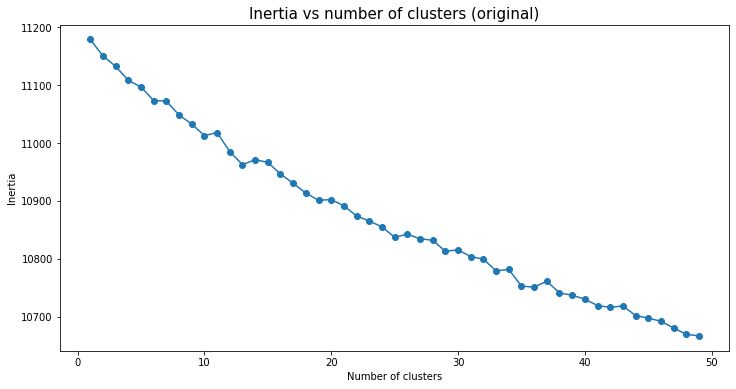

In [6]:
#number of cluster: inertia
#1: 11178.826413155772
#2: 11150.400853999261
#3: 11132.353766592747
#4: 11108.456545712892
#5: 11096.713602010732
#6: 11073.320429730355
#7: 11072.39998772233
#8: 11048.33989917782
#9: 11032.810484311063
#10: 11012.661542327205
#11: 11018.060307102027
#12: 10985.190325745329
#13: 10962.616600781046
#14: 10971.10809503068
#15: 10966.635272797272
#16: 10946.370170490778
#17: 10930.49824082855
#18: 10913.473273728529
#19: 10901.143971599216
#20: 10902.281384358714
#21: 10891.556467522822
#22: 10874.053401115769
#23: 10865.231345867684
#24: 10855.216255507545
#25: 10837.285101422805
#26: 10842.510489209759
#27: 10834.717868538706
#28: 10832.002065750303
#29: 10813.047213665384
#30: 10815.495497556796
#31: 10803.81561528904
#32: 10799.438916954254
#33: 10779.209526363305
#34: 10781.699569683877
#35: 10752.89202109325
#36: 10751.063808364475
#37: 10761.410910584642
#38: 10741.089282850466
#39: 10737.1058016129
#40: 10730.29651225045
#41: 10719.30795180262
#42: 10716.124062592044
#43: 10718.733856550256
#44: 10702.006298657712
#45: 10697.614064225287
#46: 10692.120264324109
#47: 10680.529395521968
#48: 10669.688794435424
#49: 10666.757787309185

inertia_list=[11178.826413155772, 11150.400853999261, 11132.353766592747, 11108.456545712892, 11096.713602010732, 11073.320429730355,
              11072.39998772233, 11048.33989917782, 11032.810484311063, 11012.661542327205, 11018.060307102027, 10985.190325745329,
              10962.616600781046, 10971.10809503068, 10966.635272797272, 10946.370170490778, 10930.49824082855, 10913.473273728529, 
              10901.143971599216, 10902.281384358714, 10891.556467522822, 10874.053401115769, 10865.231345867684, 10855.216255507545,
              10837.285101422805, 10842.510489209759, 10834.717868538706, 10832.002065750303, 10813.047213665384, 10815.495497556796,
              10803.81561528904, 10799.438916954254, 10779.209526363305, 10781.699569683877, 10752.89202109325, 10751.063808364475,
              10761.410910584642, 10741.089282850466, 10737.1058016129, 10730.29651225045, 10719.30795180262, 10716.124062592044,
              10718.733856550256, 10702.006298657712, 10697.614064225287, 10692.120264324109, 10680.529395521968, 10669.688794435424,
              10666.757787309185]
plt.figure(figsize=(12,6))
plt.plot(range(1,50),inertia_list, marker='o')
plt.title('Inertia vs number of clusters (original)', fontsize='15')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Without header and footer

Text(0, 0.5, 'Inertia')

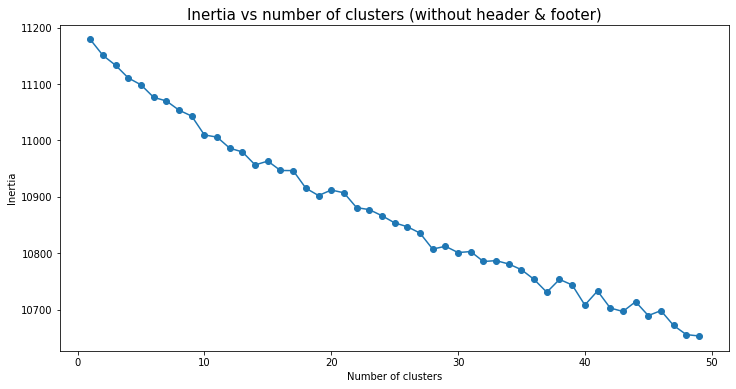

In [7]:
#without headings and footing
#1: 11178.826413155772
#2: 11150.601382082172
#3: 11133.008472154275
#4: 11110.58807588727
#5: 11098.446313498283
#6: 11076.255644049734
#7: 11069.86161924075
#8: 11053.55164454176
#9: 11043.001687825192
#10: 11009.593500953795
#11: 11005.80609824529
#12: 10986.13867595982
#13: 10979.506056852772
#14: 10956.50515016217
#15: 10963.281111849235
#16: 10946.629799661767
#17: 10946.440505046337
#18: 10915.246863272429
#19: 10902.239154208264
#20: 10912.042381494057
#21: 10907.129001653357
#22: 10880.820376907544
#23: 10877.33227426211
#24: 10866.466675674294
#25: 10853.839500308555
#26: 10846.996892542784
#27: 10835.726058790398
#28: 10807.294637644598
#29: 10812.380532204184

#30: 10801.21910045947
#31: 10802.962241116056
#32: 10785.389322319463
#33: 10786.884089986568
#34: 10780.965202930201
#35: 10770.795698529944
#36: 10753.592259759665
#37: 10730.87539597427
#38: 10753.673205878624
#39: 10743.803914949347
#40: 10708.179264746232
#41: 10733.162834132045
#42: 10702.984935039727
#43: 10696.7936954952
#44: 10714.116516098811
#45: 10689.547480926369
#46: 10698.28196854033
#47: 10671.95887910459
#48: 10655.809894395365
#49: 10653.390091632942
    
inertia_list=[11178.826413155772, 11150.601382082172, 11133.008472154275, 11110.58807588727, 11098.446313498283,
              11076.255644049734, 11069.86161924075, 11053.55164454176, 11043.001687825192, 11009.593500953795,
              11005.80609824529, 10986.13867595982, 10979.506056852772, 10956.50515016217, 10963.281111849235, 
              10946.629799661767, 10946.440505046337, 10915.246863272429, 10902.239154208264, 10912.042381494057,
              10907.129001653357, 10880.820376907544, 10877.33227426211, 10866.466675674294, 10853.839500308555, 
              10846.996892542784, 10835.726058790398, 10807.294637644598, 10812.380532204184, 10801.21910045947, 
              10802.962241116056, 10785.389322319463, 10786.884089986568, 10780.965202930201, 10770.795698529944,
              10753.592259759665, 10730.87539597427, 10753.673205878624, 10743.803914949347, 10708.179264746232,
              10733.162834132045, 10702.984935039727, 10696.7936954952, 10714.116516098811, 10689.547480926369, 
              10698.28196854033, 10671.95887910459, 10655.809894395365, 10653.390091632942]

plt.figure(figsize=(12,6))
plt.plot(range(1,50),inertia_list, marker='o')
plt.title('Inertia vs number of clusters (without header & footer)', fontsize='15')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Conclusion

Based on the Elbow method, if there was an ideal number of clusters to be chosen, the plotted graph should approach a saturation where increases in the number of clusters result in a minimal increase in inertia. <br><br>
However, can see that increasing the number of clusters results in a consistent decrease in the inertia value, with or without the headers. This could imply that there is no clear demarcation between the various topics and there is much overlap between each topic, thus a lack of distinct clusters.

## An alternative way of splitting topics via key words
1. We can consider splitting the topics based on the general categories described by the major (and general) key words identified in the visualization below
1. i.e. Politics, Sports, Computer, Religion, Space/Astronomy, Education
For the purpose of the rest of the evaluation, we shall set the number of topics to be 20 as per the labels available in the dataset.

# Generating description of each topic
### To find the description of the topic, we should look at the list of most important words within the cluster for a better understanding of the topic.
1. Create a model with 20 clusters
1. Sort the in descending order the most relevant words in each cluster
1. Retrieve the corresponding words from the vectorizer
1. Store each cluster in a list

In [8]:
true_k = 20

model = KMeans(n_clusters=true_k, init='k-means++', n_init = 1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# Sort and retrieve words
# cluster_centers return an array with feature terms as index, and the probability of occurence as tvalue
# sorting returns index of the term with highest probability of occurences
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names()

In [10]:
cluster_list = []

#get most relevant 20 words in each cluster
for i in range(true_k):
    list = []
    for ind in order_centroids[i, :20]:
        list.append(terms[ind])
    cluster_list.append(list)
        
for i in range(true_k):
    print("Cluster %d:" % i)
    print(cluster_list[i])

Cluster 0:
['card', 'video', 'drivers', 'driver', 'monitor', 'vga', 'windows', 'cards', 'bus', 'vesa', 'diamond', 'ati', 'mode', 'graphics', 'know', 'svga', 'colors', 'color', 'does', 'isa']
Cluster 1:
['com', 'article', 'writes', 'hp', 'edu', 'netcom', 'just', 'don', 'like', 'people', 'car', 'think', 'sandvik', 'att', 'know', 'good', 'sun', 'does', 'cb', 'bike']
Cluster 2:
['windows', 'file', 'window', 'files', 'dos', 'program', 'use', 'ms', 'running', 'manager', 'run', 'ftp', 'version', 'know', 'using', 'like', 'problem', 'help', 'thanks', 'pc']
Cluster 3:
['key', 'keys', 'ax', 'chip', 'bit', 'bits', 'escrow', 'public', 'des', 'encrypted', 'pgp', 'rsa', 'secret', 's1', 'random', '80', 'number', 'serial', 's2', 'session']
Cluster 4:
['people', 'gun', 'don', 'government', 'guns', 'think', 'edu', 'just', 'like', 'right', 'writes', 'com', 'law', 'weapons', 'article', 'crime', 'make', 'time', 'state', 'rights']
Cluster 5:
['space', 'nasa', 'moon', 'gov', 'launch', 'orbit', 'earth', 'lunar

# Visualization of topics

We can use a wordcloud for a more visual aproach

In [11]:
#store our mappings
dict_list = []

#create mapping for each cluster word:probability. 
for i in range(true_k):
    dict={}
    for ind in order_centroids[i][:40]:
        dict[terms[ind]] = model.cluster_centers_[i][ind]
    dict_list.append(dict)
    
print(dict_list[0])

{'card': 0.1561643421505814, 'video': 0.06344481292134273, 'drivers': 0.057755595229310765, 'driver': 0.04242912648024709, 'monitor': 0.04172701462078282, 'vga': 0.03893920779829684, 'windows': 0.03683768781785633, 'cards': 0.03593515490744768, 'bus': 0.03342605610608893, 'vesa': 0.03137085815553722, 'diamond': 0.030483819618922946, 'ati': 0.029697079422553025, 'mode': 0.025025670138571172, 'graphics': 0.023669748561905686, 'know': 0.023582029969535904, 'svga': 0.023564621957191865, 'colors': 0.02335154697070957, 'color': 0.02301156526837867, 'does': 0.02264906212332456, 'isa': 0.022626600253461707, 'vlb': 0.020638470478226194, 'ram': 0.01995811630596362, '256': 0.019841475925330844, 'memory': 0.01905457067412837, 'thanks': 0.018729735078713568, 'pc': 0.01856916690317823, 'eisa': 0.017917337262094848, '24': 0.01762541274914178, '16': 0.017552644128442936, 'problem': 0.016195744053959616, 'hi': 0.016017839081144136, 'edu': 0.015946871461857675, 'latest': 0.015337396472549716, 'ultra': 0

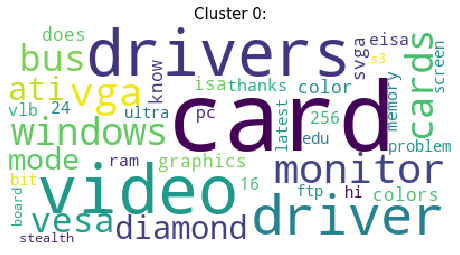

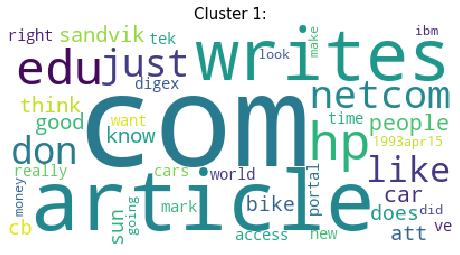

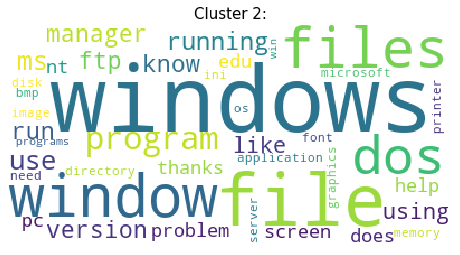

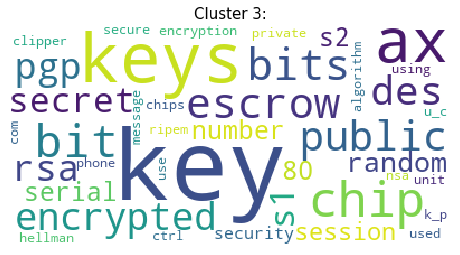

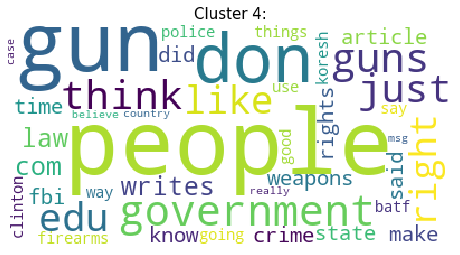

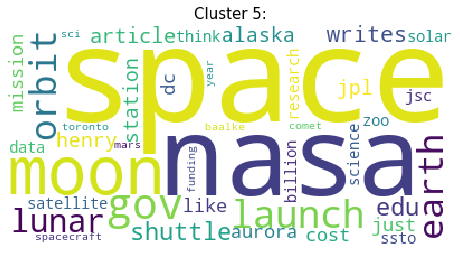

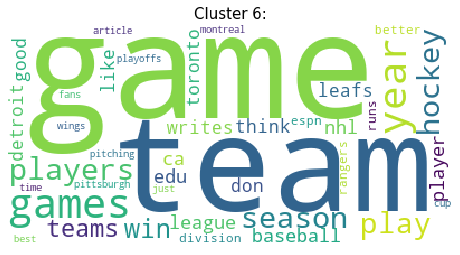

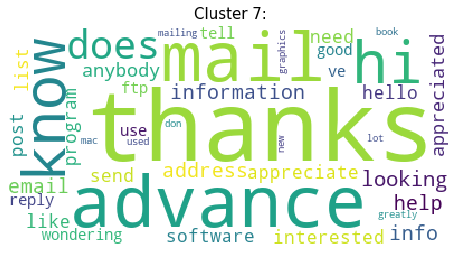

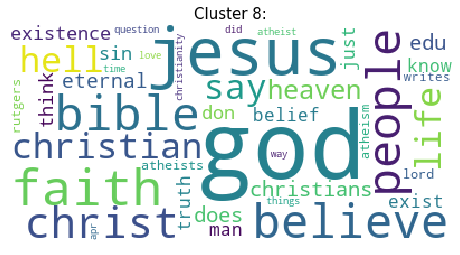

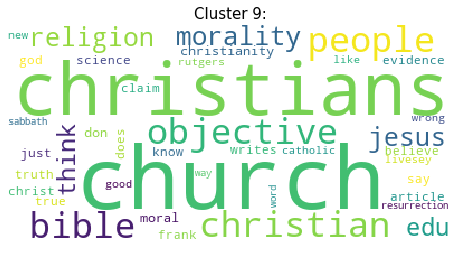

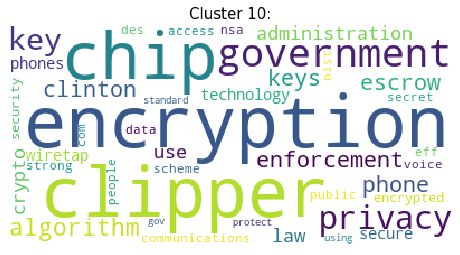

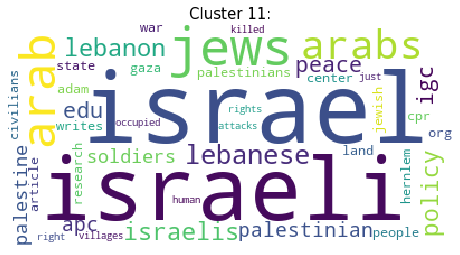

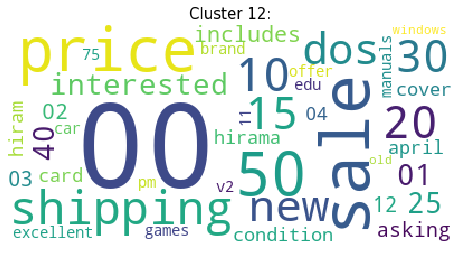

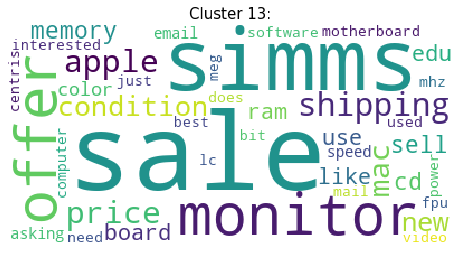

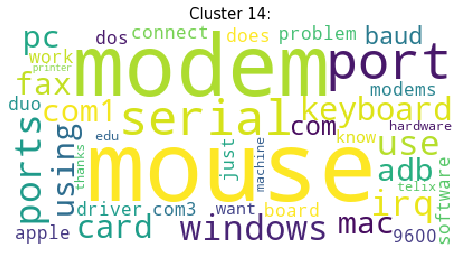

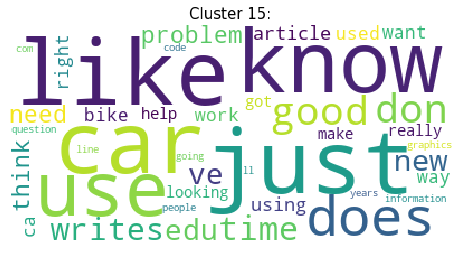

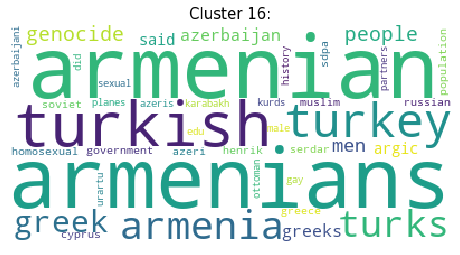

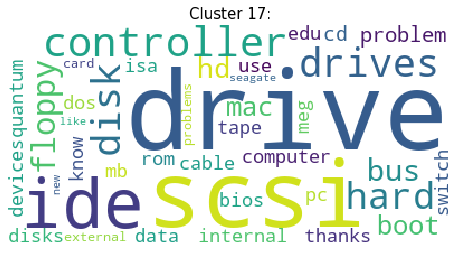

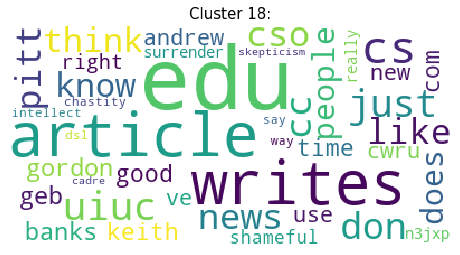

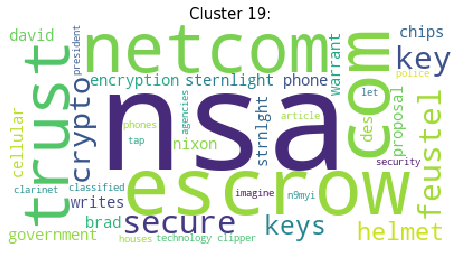

In [12]:
from wordcloud import WordCloud

for i in range(true_k):
    wordcloud = WordCloud(background_color="white",relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_list[i])
    fig = plt.figure(figsize=(8,6))
    plt.axis('off')
    plt.title('Cluster %d:' % i, fontsize='15')
    plt.imshow(wordcloud)
    plt.show()

# Verify Accuracy

Initial proposed method to test accuracy of our model:
1. Based on our identification of the description of each cluster, map each cluster to one of the original labels.
1. In the result of our predictions, convert the value of our cluster to that corresponding of the original label.
    1. i.e. we identified '0' : 'comp.graphics' from original label
    1. In our clusters, we identified cluster 2 to be 'comp.graphics'
    1. In our results, we will change the value 2 to 0, reflecting the original label
1. Compare the labels in our predictions to the original labels, noting down the number of comparisons which are the same.
1. Print as a percentage: number of same / total 
1. This will be the accuracy of our model.

## Limitations
Based on observations from the descriptions, it is actually rather difficult to identify which cluster corresponds to which label. For example, talk.politics.mideast and talk.politics.misc has a very vague difference between them as the latter is simply a more generic form of categorization in the main topic of politics. <br>

However, when we consider the merits of using an unsupervised cluster analysis in the first place, it is not to obtain the labels that we already had. Otherwise we can easily use the labels for supervised learning. <br><br> In fact, a useful clustering result will diverge from the known solution, and offer an alternate view of the data.

### Access accuracy via word frequency in the new cluster
1. Use the created model to make predictions o test data.
1. Split the test data into their predicted clusters.
1. Consolidate the frequency of words in each predicted cluster.
1. Obtain the most frequent words of each cluster.
1. Compare the most frequent words to that in our description.

#### Test and consolidate into clusters

In [13]:
newsgroups_test = fetch_20newsgroups(subset='test', random_state=42)
test = vectorizer.transform(newsgroups_test.data)
test_result = model.predict(test)

#create an array for each cluster
predict_cluster_list = []
for i in range(true_k):
    temp = []
    predict_cluster_list.append(temp)

# consolidate docs in each cluster
for doc in range(len(test_result)):
    predict_cluster_list[test_result[doc]].append(newsgroups_test.data[doc])


#### Obtain most frequent words

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)

# change the value of 'myCluster' to obtain common words of the respective cluster
myCluster = 3
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(predict_cluster_list[myCluster])
cluster_dict = {}

# calculate tf-idf scores for the cluster
# consolidate count of top 10 words in each doc
for doc in range(tfidf_vectorizer_vectors.shape[0]):
        tf_idf_vector_ind = tfidf_vectorizer_vectors[doc]

        df = pd.DataFrame(tf_idf_vector_ind.T.todense(),index = tfidf_vectorizer.get_feature_names(),columns=["tfidf"])
        df = df.sort_values(by=["tfidf"],ascending=False)
        for word in df.index.values[:10]:
            if(cluster_dict.get(word,0) == 0):
                cluster_dict[word] = 1
            else:
                tempNum = cluster_dict[word]
                cluster_dict[word] = tempNum + 1



### Represent both our predicted cluster and the original cluster as a wordcloud and compare

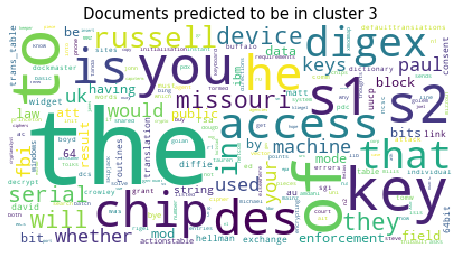

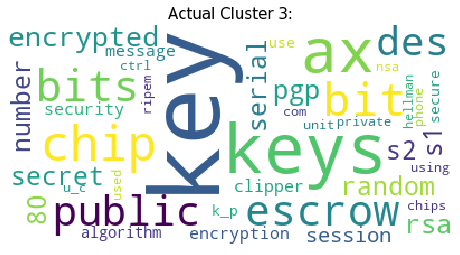

In [19]:
wordcloud = WordCloud(background_color="white",relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(cluster_dict)
fig = plt.figure(figsize=(8,6))
plt.axis('off')
plt.title('Documents predicted to be in cluster %d' % myCluster, fontsize='15')
plt.imshow(wordcloud)
plt.show()
                
wordcloud = WordCloud(background_color="white",relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_list[myCluster])
fig = plt.figure(figsize=(8,6))
plt.axis('off')
plt.title('Actual Cluster %d:' % myCluster, fontsize='15')
plt.imshow(wordcloud)
plt.show()



# Conclusion
We can see that there are numerous common keywords found in both the predicted cluster and the original cluster. 

# Predicting individual texts

In [17]:
print("\n")
print("Prediction")

## store predicted text in variable 'sent'
sent = [newsgroups_test.data[25]]

print(sent)
X = vectorizer.transform(sent)
predicted=model.predict(X)
print(predicted)



Prediction
['From: george@crayola.East.Sun.COM (George A. Perkins  Sun Microsystems  Tampa FL  Systems Engineer)\nSubject: Lithium questions, Doctor wants my 10 year old on it...\nOrganization: Sun Microsystems, Inc.\nLines: 33\nDistribution: world\nReply-To: george@crayola.East.Sun.COM\nNNTP-Posting-Host: crayola.east.sun.com\nKeywords: lithium, info\n\n\nHi sci.med folks...\n\nI would like to know anything you folks can tell me regarding Lithium.\n\nI have a 10 year old son that lives with my ex-wife.  She has been having\ndifficulty with his behavior and has had him on Ritalin, Tofranil, and now\nwants to try Lithuim at the local doctors suggestion.  I would like to \nknow whatever is important that I should know.  I worry about this sort of\nthing and would like pros/cons regarding Lithium therapy.\n\nI have a booklet from the "Lithium Information Center" based at the \nUniversity of Wisconsin, but feel that it is pro-lithium and would be\ninterested in comments from the "not nec